*Data Science Course - Telkom Digital Talent Incubator*


---




# **Pie Sales Prediction Using Multiple Linear Regression**
Today we will using multiple linear regression for predict about pie sales with price and advertising price as dependent variables. Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

1. How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
2. The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).


## **Multiple Linear Regression**

In [22]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [23]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/nandasbl/DTI-tugas5/main/dti/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


# **Descriptive Data Analysis**
Before we start using multi-linear regression, we should take a look about correlation between variables.


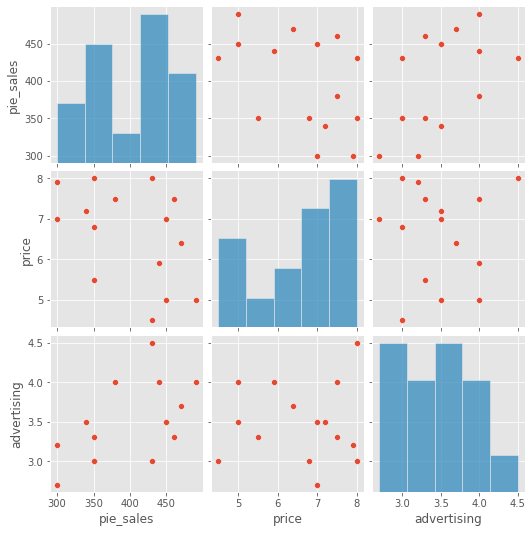

In [24]:
sns.pairplot(df_pie.drop('week', axis=1))

As shown on the graph, we can see that there might be a correlations between price, advertising and pie sales. To know deeper about the correlations,let's take a look at the graph below.

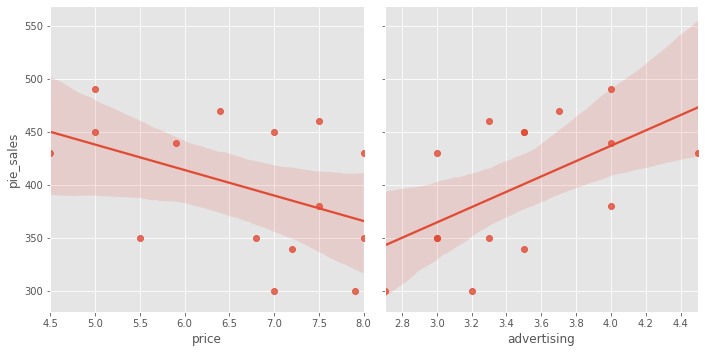

In [25]:
# Visualize the data using scatterplot
g = sns.PairGrid(df_pie, y_vars=["pie_sales"], x_vars=["price", "advertising"], height=5)
g.map(sns.regplot)


the graph shows corellations between price and advertising as dependent variables with pie sales as independent variable.


1.   We can see that price and pie_sales has a negative relationship means that variable tend to move in the opposite direction. If price increase then sales will decrease and vice versa.
2.   In the graph adversiting and pie_sales, the correlation between variables has a positive relationship means that variable tend to move in the same direction. If advertising increase the pie sales will increase.



### **Regression using Sklearn**

In [26]:
# Set independent and dependent variables
X = df_pie[['price','advertising']]
Y = df_pie['pie_sales']

In [27]:
X.head()

,price,advertising
0,5.5,3.3
1,7.5,3.3
2,8.0,3.0
3,8.0,4.5
4,6.8,3.0


In [28]:
Y.head()

0    350
1    460
2    350
3    430
4    350
Name: pie_sales, dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#Checking intercept and coeffecient in price and advertising
print('Intercept: ', regr.intercept_, '\n')
coeffecients = pd.DataFrame(regr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Intercept:  306.5261932837436 



,Coeffecient
price,-24.975090
advertising,74.130957


The model above will make linear regression model:
y=b0 + b1x1 + b2X2

---


y= 306.526 - 24.975 + 74.130


#**Model Prediction**


In [31]:
X['price'].mean()

6.613333333333333

In [32]:
X['advertising'].mean()

3.48

### **Regression using Statsmodels**

In [33]:
X = sm.add_constant(X) # adding a constant

In [34]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

olsmodel = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        12:00:44   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

#**Autocorellation with Durbin Watson**

The Durbin Watson Test is a measure of autocorrelation (also called serial correlation) in residuals from regression analysis. Autocorrelation is the similarity of a time series over successive time intervals. It can lead to underestimates of the standard error and can cause you to think predictors are significant when they are not.

In [35]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

1.6831203020921253

If we choose  α = 0.05 then the model gives the critical values corresponding to n = 15 and two regressor as dL = 0.95 and dU = 1.54

4-dU=2.4568

4-dL=3.0545

D > dU and D < 4-dU

Then H0 is true

There's no autocorellation in the data



# **Accuracy Assestment**


#**R-square**

In [36]:
print('R2 score:', olsmodel.rsquared)

R2 score: 0.5214779360292285


R-squared is always between 0 and 100%:

1. 0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
2. 100% represents a model that explains all of the variation in the response variable around its mean.

In our case we got R-squared score 52.1% which mean price and advertising affect price sales 52.1% and others are influenced by other attributes.

Mean Absolute Error (MAE) is a measure of errors between paired observations expressing the same phenomenon.

Mean Squared Error (MSE) is a measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

Root Mean Squared Error is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

In [40]:
from sklearn import metrics

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

Mean Absolute Error: 34.54567364769344
Mean Squared Error: 1802.220431150363
Root Mean Squared Error: 42.452566838182626


#**F test**
H0 = there is a autocorrelation

H1 = there is no autocorrelation

We are going to calculate F-test using F-statistic=  6.539

df1=k-1= 2

df2= n-k = 15-3=12

Based on F tabel we know that F tabel is 3,68

Fstatistic > F means that pie_sales is significantly affected by price and advertising.

#**T-Test**

**Price:**

Significant: $\alpha$ = 5% atau 0.05.
t= -2.306 df= 12 with alpha= 5%/2= 2.5% (two-tail test)

 based on T table T= 2.17881

**Advertising:**

 Significant:  α  = 5% atau 0.05. t= 2.885 df= 12 with alpha= 5%/2= 2.5% (two-tail test)

based on T table T= 2.17881





#**Assumption Testing**


**1. Multicorallity**

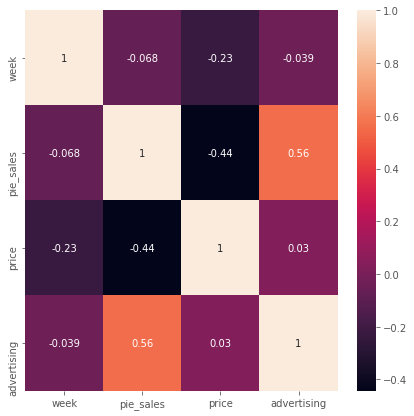

In [37]:
sns.heatmap(df_pie.corr(), annot=True)

**2. Linearity**

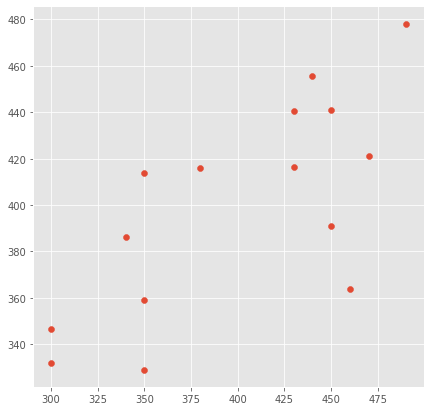

In [45]:
plt.scatter(Y, predictions)
plt.plot(color='darkorange')
plt.show()


Graph below shows that there's a correlation between indepdent and dependent variables

3. Normality

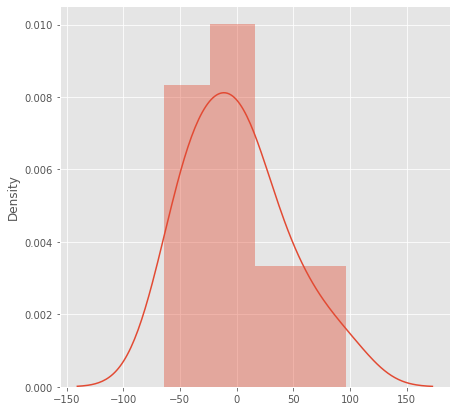

In [39]:
sns.distplot((Y-predictions));

#**Summary**



We can cleary see that the model running well with MAE= 34.54, MSE= 1802.2 and RMSE= 42.45 and R-square= 0.52. But we can't depend on these two attributs for the succession of pie sales because there's 48% with unknown attributs may be the determinant of pie sales. 